135791
135791
Percentage of diabetes in original dataset:18.36784995040428%
Percentage of diabetes in the new data:50.0%
Number diabetes train dataset:  110896
Number diabetes test dataset:  55449
Total number of diabetes:  166345

Number diabetes train dataset:  181054
Number diabetes test dataset:  90528
Total number of diabetes:  271582
[0 0 1 ... 0 1 1]
precision: [0.80273785 0.73149705]
recall: [0.69707997 0.82811048]
fscore: [0.74618726 0.77681129]
support: [45342 45186]
accuracy: 0.7624823259102156
              precision    recall  f1-score   support

           0       0.80      0.70      0.75     45342
           1       0.73      0.83      0.78     45186

    accuracy                           0.76     90528
   macro avg       0.77      0.76      0.76     90528
weighted avg       0.77      0.76      0.76     90528

0.762595223351028
specificity: 0.6970799700057342
sensitivity: 0.8281104766963219


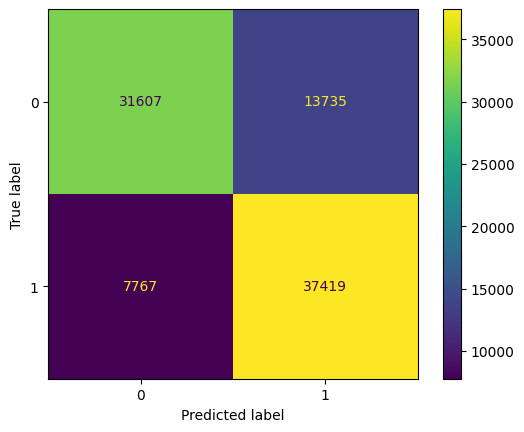

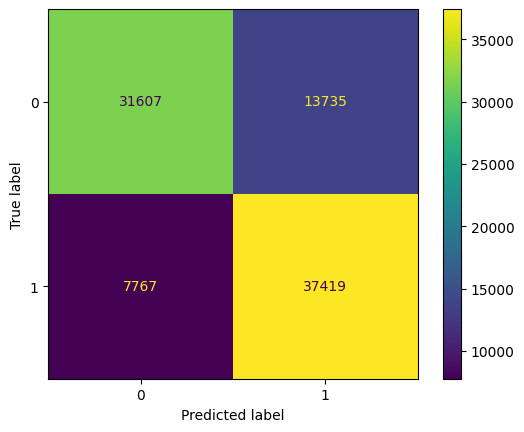

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report
from sklearn.metrics import precision_recall_fscore_support,ConfusionMatrixDisplay,accuracy_score

# Loading dataset
df = pd.read_csv(r"C:\Users\Roccas\Documents\TMU Data\CIND820 Big Data Analytics Project\LLCP2021XPT\diabetes_health_indicators_BRFSS2021_v21.csv")

#Showing current imbalance
"""x=df.drop(["Diabetes"],axis=1)
y=df["Diabetes"]

count_class = y.value_counts() # Count the occurrences of each class
plt.bar(count_class.index, count_class.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(count_class.index, ['Diabetes 0', 'Diabetes 1'])
plt.show()"""

# Diabetes is the dependent value
X = df.iloc[:, df.columns != 'Diabetes']
y = df.iloc[:, df.columns == 'Diabetes']

# Apply SMOTE to create observations for Diabetes
sm = SMOTE(sampling_strategy='minority')
X_sampled,y_sampled = sm.fit_resample(X,y.values.ravel())
y.value_counts()

# Confirm values are similar now
print(np.count_nonzero(y_sampled == 0))
print(np.count_nonzero(y_sampled == 1))

# Percentage of diabetes in original data
Source_data_no_diabetes_count = len(df[df.Diabetes==0])
Source_data_diabetes_count = len(df[df.Diabetes==1])
print('Percentage of diabetes in original dataset:{}%'.format((Source_data_diabetes_count*100)/(Source_data_no_diabetes_count+Source_data_diabetes_count)))

# Percentage of diabetes in sampled data
Sampled_data_no_diabetes_count = len(y_sampled[y_sampled==0])
Sampled_data_diabetes_count = len(y_sampled[y_sampled==1])
print('Percentage of diabetes in the new data:{}%'.format((Sampled_data_diabetes_count*100)/(Sampled_data_no_diabetes_count+Sampled_data_diabetes_count)))

# Splitting Original dataset 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 1/3, random_state = 0)

print("Number diabetes train dataset: ", len(X_train))
print("Number diabetes test dataset: ", len(X_test))
print("Total number of diabetes: ", len(X_train)+len(X_test))

# Splitting Undersampled dataset
X_train_sampled, X_test_sampled, y_train_sampled, y_test_sampled = train_test_split(X_sampled
                                                                                                   ,y_sampled
                                                                                                   ,test_size = 1/3
                                                                                                   ,random_state = 0)
print("")
print("Number diabetes train dataset: ", len(X_train_sampled))
print("Number diabetes test dataset: ", len(X_test_sampled))
print("Total number of diabetes: ", len(X_train_sampled)+len(X_test_sampled))

X_train_sampled_df = pd.DataFrame(X_train_sampled)
y_train_sampled_df = pd.DataFrame(y_train_sampled)
X_test_sampled_df = pd.DataFrame(X_test_sampled)
y_test_sampled_df = pd.DataFrame(y_test_sampled)

# KNN
KNN = KNeighborsClassifier(n_neighbors=7) 

SC = StandardScaler()
xtrain = SC.fit_transform(X_train_sampled)
xtest = SC.transform(X_test_sampled)
  
KNN.fit(xtrain, y_train_sampled)
  
y_pred_KNN = KNN.predict(xtest)

print(y_pred_KNN)

# Confusion Matrix - KNN

CM_LR = confusion_matrix(y_test_sampled, y_pred_KNN)

disp = ConfusionMatrixDisplay(confusion_matrix=CM_LR)

disp.plot()
  
CM_KNN = confusion_matrix(y_test_sampled, y_pred_KNN)

disp = ConfusionMatrixDisplay(confusion_matrix=CM_KNN)

disp.plot()

#Calculating Classifier performances

precision, recall, fscore, support = precision_recall_fscore_support(y_test_sampled, y_pred_KNN)

accuracy = accuracy_score(y_test_sampled, y_pred_KNN)

# Code to print out results
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print('accuracy: {}'.format(accuracy))

# Classification report with tabled results + AUC score
print(classification_report(y_test_sampled, y_pred_KNN))
#print(roc_auc_score(y_pred_KNN, KNN.predict_proba(xtest)[:, 1]))
print(roc_auc_score(y_test_sampled, y_pred_KNN))

# Manually calculating specificity + sensitivity
tn, fp, fn, tp = confusion_matrix(y_test_sampled, y_pred_KNN).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print('specificity: {}'.format(specificity))
print('sensitivity: {}'.format(sensitivity))